# **Support Vector Machine**
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification, regression, and outlier detection tasks. Introduced by Vladimir Vapnik and his colleagues in the 1990s, SVM has gained immense popularity due to its effectiveness in handling high-dimensional data and its ability to generalize well even in cases of limited training samples.

#### **How SVM Works:**

1. **Basic Concept:**
   At its core, SVM aims to find the hyperplane that best separates different classes in the feature space. This hyperplane is chosen in such a way that it maximizes the margin, which is the distance between the hyperplane and the nearest data point (called a support vector) from each class.
   
<div style="display: flex;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*XHO84_yTSEe8_xdLCJQnRA.gif" alt="Image 1" style="width: 50%; margin-right: 5px;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*bcxHpBNenGWdiepxZWTj5w.gif" alt="Image 2" style="width: 50%; margin-left: 5px;">
</div>

2. **Kernel Trick:**
   SVM can efficiently handle nonlinear decision boundaries using what's known as the kernel trick. Instead of explicitly mapping data points into higher-dimensional spaces, SVM computes the inner products between the data points in the feature space, often avoiding the need to compute the transformation explicitly. Popular kernels include linear, polynomial, radial basis function (RBF), and sigmoid.
   
<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" width="60%"></center>

3. **Optimization Objective:**
   SVM aims to minimize the classification error while maximizing the margin. This is formulated as an optimization problem, typically solved using techniques like convex optimization. The decision function is derived from the support vectors, which are the data points closest to the hyperplane.

4. **Margin and Regularization:**
   SVM allows for a trade-off between maximizing the margin and minimizing the classification error. This trade-off is controlled by a regularization parameter (C), which balances the importance of maximizing the margin against allowing some misclassifications.


#### **Advantages of SVM:**

1. **Effective in High-Dimensional Spaces:**
   SVM performs well even in cases where the number of dimensions exceeds the number of samples, making it suitable for high-dimensional data.

2. **Robust to Overfitting:**
   SVM's regularization parameter helps prevent overfitting by controlling the complexity of the model.

3. **Effective with Nonlinear Data:**
   The kernel trick allows SVM to handle nonlinear decision boundaries effectively.

4. **Works Well with Small/Medium-Sized Datasets:**
   SVM generalizes well even with limited training samples, making it suitable for datasets with a small to medium number of samples.



## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

import warnings
warnings.filterwarnings("ignore")

## **SVM with Hard Margin**
Support Vector Machine (SVM) with Hard Margin is a variant of SVM where the algorithm aims to find the hyperplane that completely separates the classes in the feature space, without allowing any misclassification. This means that the decision boundary must have a margin such that no data points fall within it.

#### **Characteristics of SVM with Hard Margin:**

1. **No Misclassification:** In SVM with Hard Margin, the objective is to find a hyperplane that separates the classes such that each data point is correctly classified. There is no allowance for misclassification in this setting.

2. **Large Margin:** The hyperplane chosen in SVM with Hard Margin is the one that maximizes the margin between the classes. This margin is the distance between the hyperplane and the nearest data points from each class, also known as the support vectors.

3. **Linearly Separable Data:** SVM with Hard Margin works well when the data is linearly separable, meaning that there exists a hyperplane that can perfectly separate the classes without any misclassification.

#### **Mathematical Formulation:**

The optimization problem for SVM with Hard Margin can be formulated as follows:

Minimize:
$ \frac{1}{2} ||\mathbf{w}||^2 $

Subject to:
$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 $

Here, $ \mathbf{w} $ represents the weight vector perpendicular to the hyperplane, $ b $ is the bias term, and $ (\mathbf{x}_i, y_i) $ are the training samples with feature vectors $ \mathbf{x}_i $ and corresponding class labels $ y_i $. The constraint ensures that all data points are correctly classified with a margin of at least 1.

#### **Advantages and Limitations:**

**Advantages:**
- SVM with Hard Margin guarantees a unique solution when the data is linearly separable.
- It can result in a more interpretable model since it relies only on the support vectors.

**Limitations:**
- It assumes that the data is perfectly separable, which might not always be the case in real-world scenarios.
- It can be sensitive to outliers since it aims to achieve a strict separation between classes.

In practice, SVM with Hard Margin is not commonly used due to its sensitivity to outliers and the requirement of perfectly separable data. Instead, Soft Margin SVM, which allows for some misclassification, is often preferred as it provides more flexibility and robustness to the model.

### **Make a Perfectly Linearly Separable Dataset**

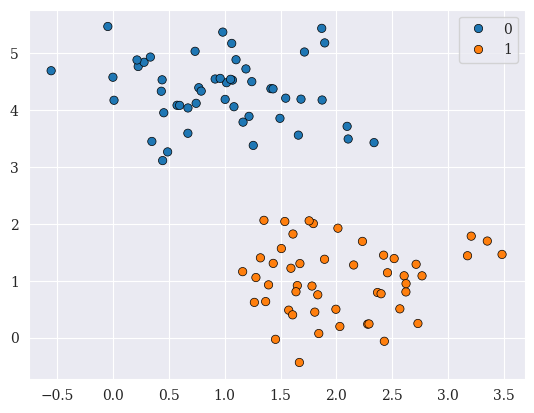

In [2]:
# Generate the data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Plor the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="black", linewidth=0.5);

### **Model Training and Validation**

In [3]:
# Instantiate a Support Vector Classifier object
svc = SVC(kernel="linear", C=1)

# Fit the training data
svc.fit(X, y)

SVC(C=1, kernel='linear')

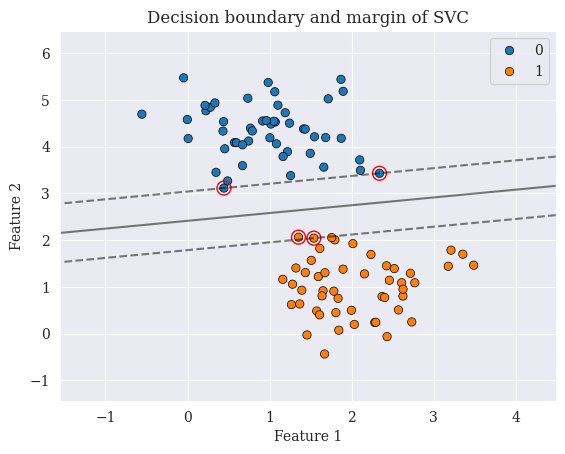

In [4]:
# Plot the decision boundaries
def plot_svc_decision_function(svc):
    '''Plot the decision function for a 2D SVC'''
    
    # Get the separating hyperplane coefficients
    w = svc.coef_[0]
    b = svc.intercept_[0]
    
    # Plot the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="black", linewidth=0.5)
    
    # Plot the decision boundary, positive and negative margins
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot the support vectors
    plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='red')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary and margin of SVC')
    plt.show()
    
plot_svc_decision_function(svc)

## **The Importance of Support Vectors**
Support vectors are crucial elements in the context of Support Vector Machines (SVM) and have significant importance in defining the decision boundary and maximizing the margin. Here's why support vectors are important:

1. **Definition of Decision Boundary:**
   Support vectors are the data points that lie closest to the decision boundary (hyperplane). They directly influence the position and orientation of the decision boundary because they are the ones that determine the margin.

2. **Maximization of Margin:**
   The margin in SVM is defined as the distance between the decision boundary and the closest data point from either class. Support vectors are the ones that lie on the margin boundary. By maximizing the margin, SVM finds the hyperplane that best separates the classes, and support vectors play a pivotal role in this process.

3. **Robustness to Outliers:**
   Support vectors are typically the data points that are most difficult to classify or lie on the margin boundary. Since SVM aims to maximize the margin, it is less affected by outliers that are not support vectors. This property makes SVM robust to noise and outliers in the data.

4. **Dimensionality Reduction:**
   In many cases, the number of support vectors is significantly smaller than the total number of training samples. This property leads to dimensionality reduction in the SVM model, making it computationally efficient, especially in high-dimensional spaces.

5. **Interpretability:**
   Since support vectors define the decision boundary, they provide insights into the structure and characteristics of the data. Analyzing support vectors can help in understanding which data points are critical for classification and how the decision boundary is determined.

6. **Generalization Performance:**
   SVM focuses on learning from the most informative data points, which are the support vectors. By emphasizing these critical examples, SVM tends to generalize well to unseen data, leading to better performance on test datasets.

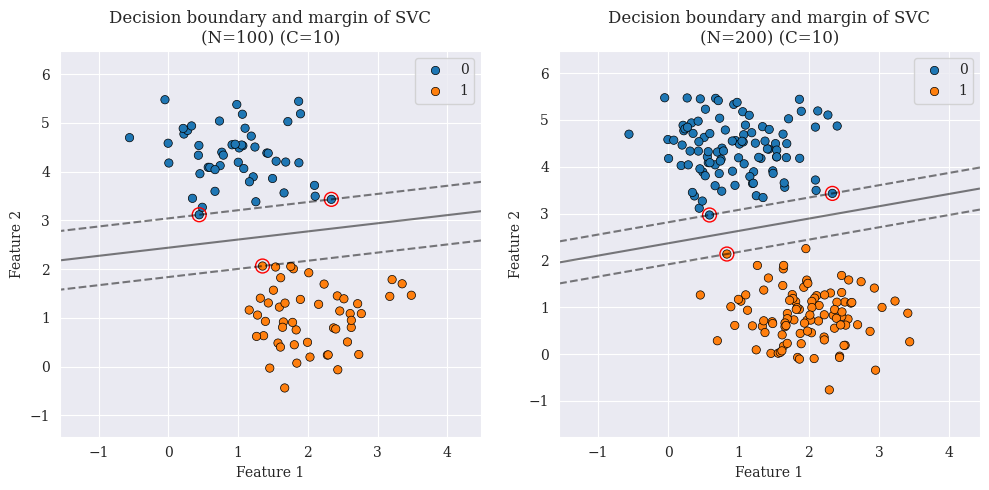

In [5]:
# Train two SVC with the datasets containing different number of sample points
def plot_svm(N=[100, 200]):
    
    fig, axes = plt.subplots(ncols=len(N), nrows=1, figsize=(len(N)*5, 5))
    axes = axes.flatten()
    
    for i in np.arange(len(N)):
        n = N[i] # Number of samples
        
        # Generate data
        X, y = make_blobs(n_samples=n, centers=2, random_state=0, cluster_std=0.60)
        
        # Train a SVC
        svc = SVC(kernel="linear", C=10)
        svc.fit(X, y)
        
        # Get the separating hyperplane coefficients
        w = svc.coef_[0]
        b = svc.intercept_[0]

        # Plot the data points
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="black", linewidth=0.5, ax=axes[i])

        # Plot the decision boundary, positive and negative margins
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axes[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])

        # Plot the support vectors
        axes[i].scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='red')

        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')
        axes[i].set_title(f'Decision boundary and margin of SVC\n(N={n}) (C=10)')

    plt.tight_layout(w_pad=2)
    
plot_svm()

## **SVM with Soft Margin**
Support Vector Machine (SVM) with soft margin is an extension of the SVM algorithm that allows for some degree of misclassification in the training data. Unlike SVM with hard margin, which requires all data points to be correctly classified and strictly enforces a maximum-margin decision boundary, SVM with soft margin introduces a regularization parameter (usually denoted as $ C) $ to control the trade-off between maximizing the margin and tolerating misclassifications.

#### **Key Characteristics:**

1. **Tolerance for Misclassification:**
   SVM with soft margin allows for some data points to fall within the margin or even on the wrong side of the decision boundary. This flexibility is particularly useful in scenarios where the data is not perfectly separable or contains outliers.

2. **Regularization Parameter $ ( C ) $:**
   The regularization parameter $ ( C ) $ controls the penalty imposed on misclassified data points. A smaller value of $ C $ results in a wider margin and more tolerance for misclassification, while a larger value of $ C $ imposes a stricter penalty for misclassification, potentially leading to a narrower margin.

3. **Optimization Objective:**
   The goal of SVM with soft margin is to find the decision boundary that separates the classes with the maximum margin while minimizing the sum of the margin violations and the regularization term. This is achieved through convex optimization techniques.

#### **Advantages:**

- **Robustness:** SVM with soft margin is more robust to noise and outliers compared to SVM with hard margin, as it allows for some degree of misclassification.
- **Flexibility:** It provides a more flexible approach to classification, allowing the algorithm to handle non-linearly separable data or cases where a strict separation is not feasible.

#### **Applications:**

- **Real-world Data:** SVM with soft margin is commonly used in scenarios where the data is noisy or contains outliers, such as image classification, text categorization, and bioinformatics.
- **Imbalanced Datasets:** It is also useful for dealing with imbalanced datasets, where one class may have significantly fewer samples than the other.

In summary, SVM with soft margin provides a balance between maximizing the margin and tolerating misclassifications, making it a versatile and effective algorithm for various classification tasks, especially in situations where strict separation is not possible or practical.

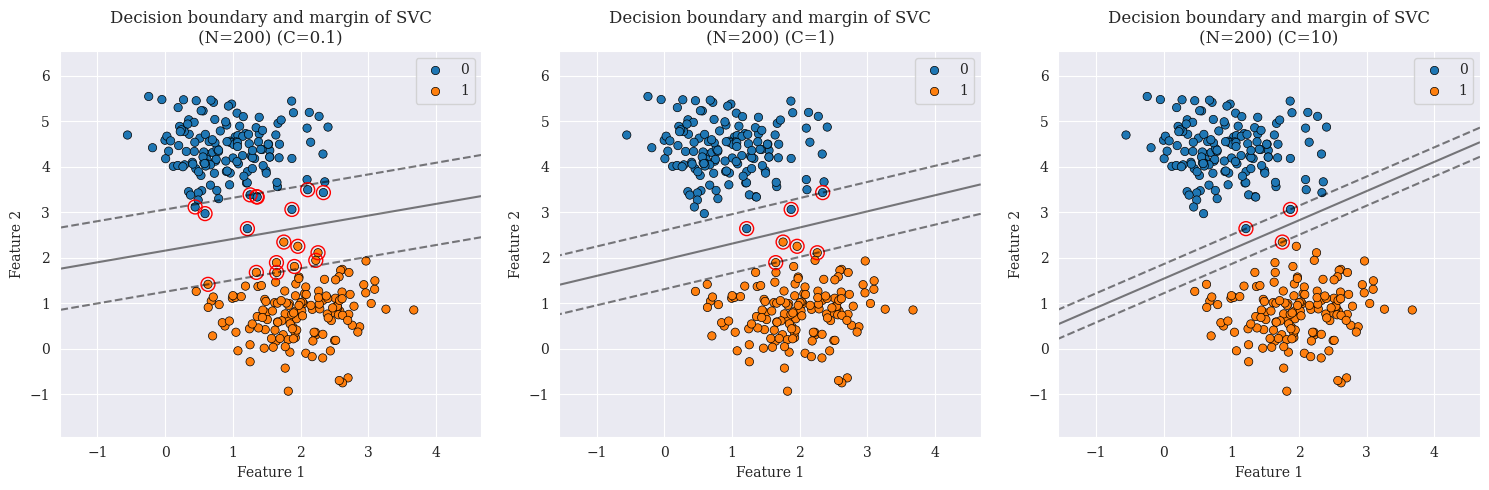

In [16]:
# Train two SVC with different C value
def plot_svm(C=[1, 10]):
    
    fig, axes = plt.subplots(ncols=len(C), nrows=1, figsize=(len(C)*5, 5))
    axes = axes.flatten()
    
    for i in np.arange(len(C)):
        c = C[i] # Value of C
        
        # Generate data
        X, y = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=0.60)
        
        # Train a SVC
        svc = SVC(kernel="linear", C=c)
        svc.fit(X, y)
        
        # Get the separating hyperplane coefficients
        w = svc.coef_[0]
        b = svc.intercept_[0]

        # Plot the data points
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="black", linewidth=0.5, ax=axes[i])

        # Plot the decision boundary, positive and negative margins
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axes[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                        linestyles=['--', '-', '--'])

        # Plot the support vectors
        axes[i].scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
                        linewidth=1, facecolors='none', edgecolors='red')

        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')
        axes[i].set_title(f'Decision boundary and margin of SVC\n(N=200) (C={c})')

    plt.tight_layout(w_pad=2)
    
plot_svm(C=[0.1, 1, 10])